In [1]:
import h2o
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 46 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 25 days
H2O_cluster_name:,deven
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.148 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
main = h2o.import_file(r'C:/Users/deven/Downloads/Cloud-forensics-features.csv')


train,test,valid = main.split_frame(ratios=[.7, .15])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
train.head()

LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,memmax_slope,mem_slope,cpus_slope,cputime_slope,memactual_slope,memswap_in_slope,memswap_out_slope,memmajor_fault_slope,memminor_fault_slope,memunused_slope,memavailable_slope,memusable_slope,memlast_update_slope,memdisk_cache_slope,memhugetlb_pgalloc_slope,memhugetlb_pgfail_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
1.60446e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0,0,0,0,0,0,73.8278,0,0.0593,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.9061,89.8986,0,0,0,0,0,0,Normal
1.60446e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0,0,0,0,0,0,0,0,0.0554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.8285,89.9897,0,0,0,0,0,0,Normal
1.60446e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.821,0,0,0,0,0,0,0,0,0.1109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.751,89.9864,0,0,0,0,0,0,Normal
1.60446e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7128,25.71,0,0,0,0,0,0,74.8904,0,0.0212,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.4349,89.9685,0,0,0,0,0,0,Normal
1.60445e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.1017,29.7449,0,0,0,0,0,0,0,1.6366,0.1146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.1986,89.9864,0,0,0,0,0,0,Normal
1.60445e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.876,27.4076,0,0,0,0,0,0,0,0,0.0212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.5288,89.958,0,0,0,0,0,0,Normal
1.60445e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7286,25.8664,0,0,0,0,0,0,0,0,0.0347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.8584,89.9829,0,0,0,0,0,0,Normal
1.60445e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7974,26.5651,0,0,0,0,0,0,73.3008,0,0.1528,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.8014,89.9818,0,0,0,0,0,0,Normal
1.60445e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0,0,0,0,0,0,0,0,0.079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.4222,89.9746,0,0,0,0,0,0,Normal
1.60445e+09,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.821,0,0,0,0,0,0,72.7766,0,0.1294,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.7398,89.9869,0,0,0,0,0,0,Normal


In [4]:
train.describe()

Rows:6663
Cols:44




,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,memmax_slope,mem_slope,cpus_slope,cputime_slope,memactual_slope,memswap_in_slope,memswap_out_slope,memmajor_fault_slope,memminor_fault_slope,memunused_slope,memavailable_slope,memusable_slope,memlast_update_slope,memdisk_cache_slope,memhugetlb_pgalloc_slope,memhugetlb_pgfail_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
type,int,int,enum,enum,real,real,int,int,real,real,int,int,real,real,real,real,int,int,int,int,int,int,int,int,real,real,int,real,real,int,int,int,real,real,real,real,real,int,real,real,int,int,int,enum
mins,1604406033.0,1.0,,,58.3925,1.7899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-84.7287,0.0,-84.6009,0.0,0.0,0.0,0.0,-89.4545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,1604482033.9282606,7.55260393216269,,,88.23981061083596,35.48989381659913,0.0,0.0,31.638745204862676,22.018409710340688,0.0,0.0,22.190097733753564,2.2945096803241776,1.000783776076842,0.001164145279903947,0.0,0.0,0.0,36.55110310670869,0.0,0.0,0.0,0.0,0.00027729251088098444,-0.012716298964430437,0.0,-0.01269711841512832,0.013103827104907699,0.0,0.0,0.0,-1.4289450998048923,0.8452017259492721,2.2658831157136423,31.76598371604382,80.46592967131923,0.0,0.027268632748011407,0.06750423232778029,0.0,0.0,0.0,
maxs,1604635652.0,10.0,,,89.9999,89.9114,0.0,0.0,90.0,89.9982,0.0,0.0,80.9097,73.8278,19.0256,4.3987,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,1.8476,0.0,0.0,0.0,87.3108,0.0,0.0,0.0,89.9929,89.593,90.0,89.0838,90.0,0.0,64.8407,89.9921,0.0,0.0,0.0,
sigma,81356.66289379167,1.7368674515481948,,,0.8044084143231652,18.601571995389325,0.0,0.0,41.1276888844183,36.705810991118554,0.0,0.0,29.10928286446677,8.010168315327196,3.7764368033491857,0.4612214097337675,0.0,0.0,0.0,44.20304728161975,0.0,0.0,0.0,0.0,0.022634611618132683,1.0379958959781763,0.0,1.0364302414183162,1.0696287335291508,0.0,0.0,0.0,32.13677821808891,7.685011230413631,14.089851231041143,27.70437301797595,27.659552530483108,0.0,1.151995473369623,2.4634884292090127,0.0,0.0,0.0,
zeros,0,0,,,0,0,6663,6663,4157,3996,6663,6663,3955,2826,402,6565,6663,6663,6663,3957,6663,6663,6663,6663,6662,6662,6663,6662,6662,6663,6663,6663,4149,6495,6495,704,704,6663,6658,6658,6663,6663,6663,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1604455142.0,7.0,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0,0.0,0.0,0.0,73.8278,0.0,0.0593,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455113.0,7.0,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455055.0,7.0,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.751,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [5]:
train = train.drop([0,1,2,3])
train = train.drop([0], axis=0)
train.head()

rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,memmax_slope,mem_slope,cpus_slope,cputime_slope,memactual_slope,memswap_in_slope,memswap_out_slope,memmajor_fault_slope,memminor_fault_slope,memunused_slope,memavailable_slope,memusable_slope,memlast_update_slope,memdisk_cache_slope,memhugetlb_pgalloc_slope,memhugetlb_pgfail_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
87.8865,27.2996,0,0,0,0,0,0,0,0,0.0554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.8285,89.9897,0,0,0,0,0,0,Normal
87.7241,25.821,0,0,0,0,0,0,0,0,0.1109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.751,89.9864,0,0,0,0,0,0,Normal
87.7128,25.71,0,0,0,0,0,0,74.8904,0,0.0212,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.4349,89.9685,0,0,0,0,0,0,Normal
88.1017,29.7449,0,0,0,0,0,0,0,1.6366,0.1146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.1986,89.9864,0,0,0,0,0,0,Normal
87.876,27.4076,0,0,0,0,0,0,0,0,0.0212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.5288,89.958,0,0,0,0,0,0,Normal
87.7286,25.8664,0,0,0,0,0,0,0,0,0.0347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.8584,89.9829,0,0,0,0,0,0,Normal
87.7974,26.5651,0,0,0,0,0,0,73.3008,0,0.1528,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21.8014,89.9818,0,0,0,0,0,0,Normal
87.8708,27.3499,0,0,0,0,0,0,0,0,0.079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.4222,89.9746,0,0,0,0,0,0,Normal
87.7241,25.821,0,0,0,0,0,0,72.7766,0,0.1294,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.7398,89.9869,0,0,0,0,0,0,Normal
87.8708,27.3499,0,0,0,0,0,0,0,0,0.0988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.4222,89.9761,0,0,0,0,0,0,Normal


In [6]:
valid = valid.drop([0,1,2,3])
valid = valid.drop([0], axis=0)
valid.head()

rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,memmax_slope,mem_slope,cpus_slope,cputime_slope,memactual_slope,memswap_in_slope,memswap_out_slope,memmajor_fault_slope,memminor_fault_slope,memunused_slope,memavailable_slope,memusable_slope,memlast_update_slope,memdisk_cache_slope,memhugetlb_pgalloc_slope,memhugetlb_pgfail_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
87.876,27.4076,0,0,0,0,0,0,0,0,0.0637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.2364,89.8741,0,0,0,0,0,0,Normal
87.9546,28.0725,0,0,0,0,0,0,0,0,0.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.4623,89.9767,0,0,0,0,0,0,Normal
87.965,28.1786,0,0,56.3099,2.0454,0,0,74.3578,0,0.0205,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.1247,89.944,0,0,0,0,0,0,Normal
87.7974,26.5651,0,0,66.8014,1.9092,0,0,0,0,0.0573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33.6901,89.9907,0,0,0,0,0,0,Normal
87.7241,25.821,0,0,0,0,0,0,0,0,0.037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.8787,89.985,0,0,0,0,0,0,Normal
87.8708,27.3499,0,0,0,0,0,0,73.8278,0,0.079,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.2415,89.9688,0,0,0,0,0,0,Normal
88.0908,28.7398,0,0,76.7837,3.6914,0,0,72.7766,0,0.0554,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.4703,89.9833,0,0,0,0,0,0,Normal
87.9593,27.2996,0,0,70.994,1.8476,0,0,0,1.8476,0.037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.9541,89.9833,0,0,0,0,0,0,Normal
88.0227,28.8866,0,0,0,0,0,0,73.8278,0,0.0395,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.7723,89.9807,0,0,0,0,0,0,Normal
87.7241,25.821,0,0,0,0,0,0,0,0,0.037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-7.3524,0,0,10.9541,89.9759,0,0,0,0,0,0,Normal


In [7]:
test = test.drop([0,1,2,3])
test = test.drop([0], axis=0)
test.head()

rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,memmax_slope,mem_slope,cpus_slope,cputime_slope,memactual_slope,memswap_in_slope,memswap_out_slope,memmajor_fault_slope,memminor_fault_slope,memunused_slope,memavailable_slope,memusable_slope,memlast_update_slope,memdisk_cache_slope,memhugetlb_pgalloc_slope,memhugetlb_pgfail_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
87.7974,26.5651,0,0,0,0,0,0,0,0,0.0302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.2756,89.9887,0,0,0,0,0,0,Normal
87.8865,27.2996,0,0,0,0,0,0,0,0,0.0554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-64.1556,0,0,5.5275,89.8916,0,0,0,0,0,0,Normal
88.0227,28.8866,0,0,55.3758,1.9749,0,0,0,0,0.0988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20.7723,89.9746,0,0,0,0,0,0,Normal
87.7974,26.5651,0,0,0,0,0,0,0,0,0.0764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.4349,89.972,0,0,0,0,0,0,Normal
87.7241,25.821,0,0,0,0,0,0,0,0,0.037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.8787,89.9711,0,0,0,0,0,0,Normal
87.7974,26.5651,0,0,0,0,0,0,0,0,0.0764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.3099,89.9832,0,0,0,0,0,0,Normal
87.9546,28.0725,0,0,0,0,0,0,0,0,0.0764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-7.5946,0,0,21.8014,89.9818,0,0,0,0,0,0,Normal
87.7241,25.821,0,0,0,0,0,0,0,0,0.0739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-14.4703,0,0,32.8285,89.9901,0,0,0,0,0,0,Normal
87.7241,25.821,0,0,0,0,0,0,0,1.8476,0.0554,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.3625,89.9908,0,0,0,0,0,0,Normal
87.7241,25.821,0,0,0,0,0,0,0,0,0.0739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.4703,0,0,35.3625,89.9908,0,0,0,0,0,0,Normal


## Model 1 :Printing probabilities/confidence using softmax activation and last layer with 2 neurons

In [8]:
model = H2ODeepLearningEstimator(hidden=[156,78,39],
                                 activation="RectifierWithDropout",
                                 hidden_dropout_ratios=[0.2,0.2,0.2],
                                 epochs=100,
                                 seed=1245,
                                 missing_values_handling = "skip",
                                 # stop model building if the logloss on the validation set does not improve at all for 5 consecutive scoring epochs
                                 stopping_rounds=5, 
                                 stopping_tolerance=0,
                                 stopping_metric="logloss",
                                 auc_type = "MACRO_OVR"
)

In [9]:
model.train(x=list(range(0,38)), y='Status',training_frame=train,validation_frame=valid)

deeplearning Model Build progress: |

C:\ProgramData\Anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [rxdrops_slope, txdrops_slope, memswap_out_slope, mem_slope, memhugetlb_pgfail_slope, cpus_slope, memdisk_cache_slope, hdawr_reqs_slope, rxerrors_slope, memswap_in_slope, vdaerror_slope, hdawr_bytes_slope, memactual_slope, txerrors_slope, memavailable_slope, memhugetlb_pgalloc_slope, memmax_slope, memmajor_fault_slope]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1649625223644_20


Status of Neuron Layers: predicting Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 18,683 weights/biases, 232.2 KB, 666,200 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,0.0,,,,,,,,,
1,,2,156,RectifierDropout,20.0,0.0,0.0,0.764223,0.34747,0.0,-0.000911,0.113483,0.496482,0.041721
2,,3,78,RectifierDropout,20.0,0.0,0.0,0.468136,0.449308,0.0,-0.01034,0.096656,0.973314,0.028589
3,,4,39,RectifierDropout,20.0,0.0,0.0,0.406831,0.453112,0.0,-0.010351,0.128935,0.962704,0.027701
4,,5,2,Softmax,,0.0,0.0,0.4781,0.467983,0.0,-0.006121,0.83283,0.002926,0.057293




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.002716050365599493
RMSE: 0.052115740094519365
LogLoss: 0.018049248523923606
Mean Per-Class Error: 0.0018128806775911934
AUC: 0.9992934713420141
AUCPR: 0.9995824900832693
Gini: 0.9985869426840281

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999103985448567: 


,,Attack,Normal,Error,Rate
0,Attack,1582.0,2.0,0.0013,(2.0/1584.0)
1,Normal,12.0,5066.0,0.0024,(12.0/5078.0)
2,Total,1594.0,5068.0,0.0021,(14.0/6662.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.999104e-01,0.998620,3.0
1,max f2,5.673624e-02,0.998267,17.0
2,max f0point5,9.999104e-01,0.999211,3.0
3,max accuracy,9.999104e-01,0.997899,3.0
4,max precision,9.999104e-01,0.999605,3.0
5,max recall,8.120737e-03,1.000000,114.0
6,max specificity,1.000000e+00,0.998737,0.0
7,max absolute_mcc,9.999104e-01,0.994223,3.0
8,max min_per_class_accuracy,9.999104e-01,0.997637,3.0
9,max mean_per_class_accuracy,9.999104e-01,0.998187,3.0



Gains/Lift Table: Avg response rate: 76.22 %, avg score: 76.25 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010357,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.013588,0.013588,31.193383,31.193383,0.013588
1,2,0.020264,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.012997,0.026585,31.193383,31.193383,0.026585
2,3,0.034074,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.018117,0.044703,31.193383,31.193383,0.044703
3,4,0.042480,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.011028,0.055731,31.193383,31.193383,0.055731
4,5,0.053137,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.013982,0.069712,31.193383,31.193383,0.069712
5,6,0.102672,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.064986,0.134699,31.193383,31.193383,0.134699
6,7,0.151456,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.064002,0.198700,31.193383,31.193383,0.198700
7,8,0.200090,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.063805,0.262505,31.193383,31.193383,0.262505
8,9,0.300360,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.131548,0.394053,31.193383,31.193383,0.394053
9,10,0.400480,1.000000e+00,1.309967,1.311442,0.998501,1.000000e+00,0.999625,1.000000,0.131154,0.525207,30.996691,31.144210,0.524575




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0033763486838607835
RMSE: 0.0581063566562281
LogLoss: 0.01656034586285078
Mean Per-Class Error: 0.004072341086475363
AUC: 0.9998543858967887
AUCPR: 0.9999538273022964
Gini: 0.9997087717935773

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07197146770093935: 


,,Attack,Normal,Error,Rate
0,Attack,362.0,2.0,0.0055,(2.0/364.0)
1,Normal,3.0,1129.0,0.0027,(3.0/1132.0)
2,Total,365.0,1131.0,0.0033,(5.0/1496.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,7.197147e-02,0.997791,8.0
1,max f2,7.197147e-02,0.997526,8.0
2,max f0point5,9.999921e-01,0.998935,3.0
3,max accuracy,6.162457e-01,0.996658,6.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,3.185901e-02,1.000000,29.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,6.162457e-01,0.990963,6.0
8,max min_per_class_accuracy,6.162457e-01,0.996466,6.0
9,max mean_per_class_accuracy,9.999921e-01,0.997350,3.0



Gains/Lift Table: Avg response rate: 75.67 %, avg score: 75.56 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011364,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.015018,0.015018,32.155477,32.155477,0.015018
1,2,0.020722,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.012367,0.027385,32.155477,32.155477,0.027385
2,3,0.032086,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.015018,0.042403,32.155477,32.155477,0.042403
3,4,0.042781,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.014134,0.056537,32.155477,32.155477,0.056537
4,5,0.052139,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.012367,0.068905,32.155477,32.155477,0.068905
5,6,0.103610,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.068021,0.136926,32.155477,32.155477,0.136926
6,7,0.154412,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.067138,0.204064,32.155477,32.155477,0.204064
7,8,0.201203,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.061837,0.265901,32.155477,32.155477,0.265901
8,9,0.300802,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.131625,0.397527,32.155477,32.155477,0.397527
9,10,0.401070,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.132509,0.530035,32.155477,32.155477,0.530035




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-10 19:00:40,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-04-10 19:00:43,3.238 sec,21435 obs/sec,10.0,1,66620.0,0.454982,2.559322,-0.142222,...,0.998649,1.311414,0.016211,0.461983,2.646492,-0.159224,0.923077,0.952862,1.321555,0.037433
2,,2022-04-10 19:00:49,9.135 sec,22398 obs/sec,30.0,3,199860.0,0.052116,0.018049,0.985014,...,0.999582,1.311934,0.002101,0.058106,0.016560,0.981662,0.999854,0.999954,1.321555,0.003342
3,,2022-04-10 19:00:54,14.516 sec,23418 obs/sec,50.0,5,333100.0,0.055017,0.016742,0.983298,...,0.999579,1.311934,0.002101,0.076395,0.025215,0.968301,0.999794,0.999936,1.321555,0.002674
4,,2022-04-10 19:01:00,19.834 sec,23965 obs/sec,70.0,7,466340.0,0.137657,0.108919,0.895442,...,0.999198,1.311934,0.001951,0.150978,0.154391,0.876194,0.997031,0.998163,1.321555,0.004679
5,,2022-04-10 19:01:06,25.987 sec,23533 obs/sec,90.0,9,599580.0,0.067490,0.020613,0.974867,...,0.999783,1.311934,0.001651,0.090528,0.033552,0.955488,0.999740,0.999918,1.321555,0.004011
6,,2022-04-10 19:01:10,30.682 sec,22180 obs/sec,100.0,10,666200.0,0.139304,0.093534,0.892925,...,0.999591,1.311934,0.001651,0.149009,0.110136,0.879402,0.999772,0.999928,1.321555,0.004011
7,,2022-04-10 19:01:11,30.817 sec,22174 obs/sec,100.0,10,666200.0,0.052116,0.018049,0.985014,...,0.999582,1.311934,0.002101,0.058106,0.016560,0.981662,0.999854,0.999954,1.321555,0.003342



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,txpackets_slope,1.000000,1.000000,0.088142
1,timesys_slope,0.647207,0.647207,0.057046
2,timecpu_slope,0.584811,0.584811,0.051546
3,cputime_slope,0.565003,0.565003,0.049800
4,rxpackets_slope,0.563602,0.563602,0.049677
5,vdard_req_slope,0.560983,0.560983,0.049446
6,vdard_bytes_slope,0.557977,0.557977,0.049181
7,vdawr_reqs_slope,0.555063,0.555063,0.048924
8,memlast_update_slope,0.553227,0.553227,0.048762
9,memminor_fault_slope,0.550077,0.550077,0.048485


In [10]:
scoringhistory = model.scoring_history
scoringhistory

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1649625223644_20


Status of Neuron Layers: predicting Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 18,683 weights/biases, 232.2 KB, 666,200 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,20,Input,0.0,,,,,,,,,
1,,2,156,RectifierDropout,20.0,0.0,0.0,0.764223,0.34747,0.0,-0.000911,0.113483,0.496482,0.041721
2,,3,78,RectifierDropout,20.0,0.0,0.0,0.468136,0.449308,0.0,-0.01034,0.096656,0.973314,0.028589
3,,4,39,RectifierDropout,20.0,0.0,0.0,0.406831,0.453112,0.0,-0.010351,0.128935,0.962704,0.027701
4,,5,2,Softmax,,0.0,0.0,0.4781,0.467983,0.0,-0.006121,0.83283,0.002926,0.057293




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.002716050365599493
RMSE: 0.052115740094519365
LogLoss: 0.018049248523923606
Mean Per-Class Error: 0.0018128806775911934
AUC: 0.9992934713420141
AUCPR: 0.9995824900832693
Gini: 0.9985869426840281

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999103985448567: 


,,Attack,Normal,Error,Rate
0,Attack,1582.0,2.0,0.0013,(2.0/1584.0)
1,Normal,12.0,5066.0,0.0024,(12.0/5078.0)
2,Total,1594.0,5068.0,0.0021,(14.0/6662.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.999104e-01,0.998620,3.0
1,max f2,5.673624e-02,0.998267,17.0
2,max f0point5,9.999104e-01,0.999211,3.0
3,max accuracy,9.999104e-01,0.997899,3.0
4,max precision,9.999104e-01,0.999605,3.0
5,max recall,8.120737e-03,1.000000,114.0
6,max specificity,1.000000e+00,0.998737,0.0
7,max absolute_mcc,9.999104e-01,0.994223,3.0
8,max min_per_class_accuracy,9.999104e-01,0.997637,3.0
9,max mean_per_class_accuracy,9.999104e-01,0.998187,3.0



Gains/Lift Table: Avg response rate: 76.22 %, avg score: 76.25 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010357,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.013588,0.013588,31.193383,31.193383,0.013588
1,2,0.020264,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.012997,0.026585,31.193383,31.193383,0.026585
2,3,0.034074,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.018117,0.044703,31.193383,31.193383,0.044703
3,4,0.042480,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.011028,0.055731,31.193383,31.193383,0.055731
4,5,0.053137,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.013982,0.069712,31.193383,31.193383,0.069712
5,6,0.102672,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.064986,0.134699,31.193383,31.193383,0.134699
6,7,0.151456,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.064002,0.198700,31.193383,31.193383,0.198700
7,8,0.200090,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.063805,0.262505,31.193383,31.193383,0.262505
8,9,0.300360,1.000000e+00,1.311934,1.311934,1.000000,1.000000e+00,1.000000,1.000000,0.131548,0.394053,31.193383,31.193383,0.394053
9,10,0.400480,1.000000e+00,1.309967,1.311442,0.998501,1.000000e+00,0.999625,1.000000,0.131154,0.525207,30.996691,31.144210,0.524575




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0033763486838607835
RMSE: 0.0581063566562281
LogLoss: 0.01656034586285078
Mean Per-Class Error: 0.004072341086475363
AUC: 0.9998543858967887
AUCPR: 0.9999538273022964
Gini: 0.9997087717935773

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07197146770093935: 


,,Attack,Normal,Error,Rate
0,Attack,362.0,2.0,0.0055,(2.0/364.0)
1,Normal,3.0,1129.0,0.0027,(3.0/1132.0)
2,Total,365.0,1131.0,0.0033,(5.0/1496.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,7.197147e-02,0.997791,8.0
1,max f2,7.197147e-02,0.997526,8.0
2,max f0point5,9.999921e-01,0.998935,3.0
3,max accuracy,6.162457e-01,0.996658,6.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,3.185901e-02,1.000000,29.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,6.162457e-01,0.990963,6.0
8,max min_per_class_accuracy,6.162457e-01,0.996466,6.0
9,max mean_per_class_accuracy,9.999921e-01,0.997350,3.0



Gains/Lift Table: Avg response rate: 75.67 %, avg score: 75.56 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011364,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.015018,0.015018,32.155477,32.155477,0.015018
1,2,0.020722,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.012367,0.027385,32.155477,32.155477,0.027385
2,3,0.032086,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.015018,0.042403,32.155477,32.155477,0.042403
3,4,0.042781,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.014134,0.056537,32.155477,32.155477,0.056537
4,5,0.052139,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.012367,0.068905,32.155477,32.155477,0.068905
5,6,0.103610,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.068021,0.136926,32.155477,32.155477,0.136926
6,7,0.154412,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.067138,0.204064,32.155477,32.155477,0.204064
7,8,0.201203,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.061837,0.265901,32.155477,32.155477,0.265901
8,9,0.300802,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.131625,0.397527,32.155477,32.155477,0.397527
9,10,0.401070,1.000000e+00,1.321555,1.321555,1.000000,1.000000e+00,1.000000,1.000000,0.132509,0.530035,32.155477,32.155477,0.530035




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-10 19:00:40,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-04-10 19:00:43,3.238 sec,21435 obs/sec,10.0,1,66620.0,0.454982,2.559322,-0.142222,...,0.998649,1.311414,0.016211,0.461983,2.646492,-0.159224,0.923077,0.952862,1.321555,0.037433
2,,2022-04-10 19:00:49,9.135 sec,22398 obs/sec,30.0,3,199860.0,0.052116,0.018049,0.985014,...,0.999582,1.311934,0.002101,0.058106,0.016560,0.981662,0.999854,0.999954,1.321555,0.003342
3,,2022-04-10 19:00:54,14.516 sec,23418 obs/sec,50.0,5,333100.0,0.055017,0.016742,0.983298,...,0.999579,1.311934,0.002101,0.076395,0.025215,0.968301,0.999794,0.999936,1.321555,0.002674
4,,2022-04-10 19:01:00,19.834 sec,23965 obs/sec,70.0,7,466340.0,0.137657,0.108919,0.895442,...,0.999198,1.311934,0.001951,0.150978,0.154391,0.876194,0.997031,0.998163,1.321555,0.004679
5,,2022-04-10 19:01:06,25.987 sec,23533 obs/sec,90.0,9,599580.0,0.067490,0.020613,0.974867,...,0.999783,1.311934,0.001651,0.090528,0.033552,0.955488,0.999740,0.999918,1.321555,0.004011
6,,2022-04-10 19:01:10,30.682 sec,22180 obs/sec,100.0,10,666200.0,0.139304,0.093534,0.892925,...,0.999591,1.311934,0.001651,0.149009,0.110136,0.879402,0.999772,0.999928,1.321555,0.004011
7,,2022-04-10 19:01:11,30.817 sec,22174 obs/sec,100.0,10,666200.0,0.052116,0.018049,0.985014,...,0.999582,1.311934,0.002101,0.058106,0.016560,0.981662,0.999854,0.999954,1.321555,0.003342



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,txpackets_slope,1.000000,1.000000,0.088142
1,timesys_slope,0.647207,0.647207,0.057046
2,timecpu_slope,0.584811,0.584811,0.051546
3,cputime_slope,0.565003,0.565003,0.049800
4,rxpackets_slope,0.563602,0.563602,0.049677
5,vdard_req_slope,0.560983,0.560983,0.049446
6,vdard_bytes_slope,0.557977,0.557977,0.049181
7,vdawr_reqs_slope,0.555063,0.555063,0.048924
8,memlast_update_slope,0.553227,0.553227,0.048762
9,memminor_fault_slope,0.550077,0.550077,0.048485


<bound method ModelBase.scoring_history of >

In [11]:
sh = model.score_history()
sh = pd.DataFrame(sh)
print(sh.columns)

Index(['', 'timestamp', 'duration', 'training_speed', 'epochs', 'iterations',
       'samples', 'training_rmse', 'training_logloss', 'training_r2',
       'training_auc', 'training_pr_auc', 'training_lift',
       'training_classification_error', 'validation_rmse',
       'validation_logloss', 'validation_r2', 'validation_auc',
       'validation_pr_auc', 'validation_lift',
       'validation_classification_error'],
      dtype='object')


In [12]:
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-04-10 19:00:40,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-04-10 19:00:43,3.238 sec,21435 obs/sec,10.0,1,66620.0,0.454982,2.559322,-0.142222,...,0.998649,1.311414,0.016211,0.461983,2.646492,-0.159224,0.923077,0.952862,1.321555,0.037433
2,,2022-04-10 19:00:49,9.135 sec,22398 obs/sec,30.0,3,199860.0,0.052116,0.018049,0.985014,...,0.999582,1.311934,0.002101,0.058106,0.016560,0.981662,0.999854,0.999954,1.321555,0.003342
3,,2022-04-10 19:00:54,14.516 sec,23418 obs/sec,50.0,5,333100.0,0.055017,0.016742,0.983298,...,0.999579,1.311934,0.002101,0.076395,0.025215,0.968301,0.999794,0.999936,1.321555,0.002674
4,,2022-04-10 19:01:00,19.834 sec,23965 obs/sec,70.0,7,466340.0,0.137657,0.108919,0.895442,...,0.999198,1.311934,0.001951,0.150978,0.154391,0.876194,0.997031,0.998163,1.321555,0.004679


#### H2O-3 calculates regression metrics for classification problems.

<AxesSubplot:xlabel='epochs'>

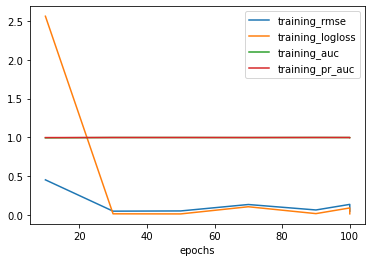

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plot training logloss and auc
sh.plot(x='epochs', y = ['training_rmse', 'training_logloss' ,'training_auc', 'training_pr_auc'])

<AxesSubplot:xlabel='epochs'>

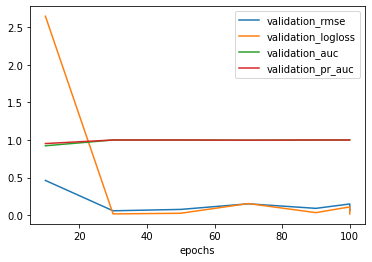

In [14]:
sh.plot(x='epochs', y = ['validation_rmse', 'validation_logloss' , 'validation_auc', 'validation_pr_auc'])

In [15]:
model.mse()

0.002716050365599493

#### Predicting Probabilities using the Entire Test Dataframe and Looking at Test Performance

In [16]:
predictions = model.predict(test)
predictions.head()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict,Attack,Normal
Normal,2.91323e-14,1
Normal,6.49212e-13,1
Normal,1.24243e-13,1
Normal,5.13409e-14,1
Normal,4.23192e-14,1
Normal,7.09098e-14,1
Normal,7.84517e-14,1
Normal,3.12518e-14,1
Normal,6.37186e-14,1
Normal,1.88202e-14,1


In [17]:
testmetrics = model.model_performance(test_data=test)

In [18]:
testmetrics.auc()

0.9998492919319215

In [19]:
testmetrics


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.0038510949220586024
RMSE: 0.06205719073611536
LogLoss: 0.019358058486739906
Mean Per-Class Error: 0.0041886449265947775
AUC: 0.9998492919319215
AUCPR: 0.9999505503853343
Gini: 0.999698583863843

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0905685559328675: 


,,Attack,Normal,Error,Rate
0,Attack,356.0,2.0,0.0056,(2.0/358.0)
1,Normal,3.0,1072.0,0.0028,(3.0/1075.0)
2,Total,359.0,1074.0,0.0035,(5.0/1433.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.056856e-02,0.997673,9.0
1,max f2,9.056856e-02,0.997395,9.0
2,max f0point5,9.999935e-01,0.999066,5.0
3,max accuracy,9.999935e-01,0.996511,5.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,1.433858e-02,1.000000,31.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.999935e-01,0.990777,5.0
8,max min_per_class_accuracy,1.297761e-01,0.996279,7.0
9,max mean_per_class_accuracy,9.999935e-01,0.997674,5.0



Gains/Lift Table: Avg response rate: 75.02 %, avg score: 74.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010468,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.013953,0.013953,33.302326,33.302326,0.013953
1,2,0.023029,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.016744,0.030698,33.302326,33.302326,0.030698
2,3,0.032798,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.013023,0.043721,33.302326,33.302326,0.043721
3,4,0.041870,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.012093,0.055814,33.302326,33.302326,0.055814
4,5,0.050942,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.012093,0.067907,33.302326,33.302326,0.067907
5,6,0.101186,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.066977,0.134884,33.302326,33.302326,0.134884
6,7,0.152128,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.067907,0.202791,33.302326,33.302326,0.202791
7,8,0.202373,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.066977,0.269767,33.302326,33.302326,0.269767
8,9,0.300070,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.130233,0.400000,33.302326,33.302326,0.400000
9,10,0.400558,1.000000e+00,1.333023,1.333023,1.000000,1.000000e+00,1.000000,1.000000,0.133953,0.533953,33.302326,33.302326,0.533953


In [20]:
# model.save_mojo("C:\\Users\\deven\\Desktop")